# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "Dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ? 
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [1]:
import pandas as pd
import glob as gb

arquivos_eleicoes_ap_pa = gb.glob('base_dados\consulta*.csv')

lista_eleicoes_ap_pa = []
for arquivo in arquivos_eleicoes_ap_pa:
    lista_eleicoes_ap_pa.append(pd.read_csv(arquivo, sep=';', encoding='latin_1'))

df_eleicoes_ap_pa = pd.concat(lista_eleicoes_ap_pa, axis=0, ignore_index=True)

todas_colunas = ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA',
       'CD_OCUPACAO', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_REELEICAO',
       'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'CD_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_PLEITO',
       'CD_SITUACAO_CANDIDATO_URNA', 'DS_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA', 'NM_TIPO_DESTINACAO_VOTOS',
       'CD_SITUACAO_CANDIDATO_TOT', 'DS_SITUACAO_CANDIDATO_TOT',
       'ST_PREST_CONTAS']

df_eleicoes_ap_pa = df_eleicoes_ap_pa.loc[:, todas_colunas].replace({'#NULO#': None, -1: None})

df_eleicoes_ap_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48682 entries, 0 to 48681
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     48682 non-null  object 
 1   HH_GERACAO                     48682 non-null  object 
 2   ANO_ELEICAO                    48682 non-null  int64  
 3   CD_TIPO_ELEICAO                48682 non-null  int64  
 4   NM_TIPO_ELEICAO                48682 non-null  object 
 5   NR_TURNO                       48682 non-null  int64  
 6   CD_ELEICAO                     48682 non-null  int64  
 7   DS_ELEICAO                     48682 non-null  object 
 8   DT_ELEICAO                     48682 non-null  object 
 9   TP_ABRANGENCIA                 48682 non-null  object 
 10  SG_UF                          48682 non-null  object 
 11  SG_UE                          48682 non-null  int64  
 12  NM_UE                          48682 non-null 

# Quantas candidaturas houveram em cada ano agrupado por gênero ? 

In [2]:
df_eleicoes_ap_pa[['DS_GENERO', 'ANO_ELEICAO', 'DT_ELEICAO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count()

DT_ELEICAO
ANO_ELEICAO DS_GENERO                 
2016        FEMININO              7243
            MASCULINO            15281
            NÃO DIVULGÁVEL           5
2020        FEMININO              8916
            MASCULINO            17235
            NÃO DIVULGÁVEL           2

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [3]:
df_eleicoes_ap_pa[df_eleicoes_ap_pa['DS_CARGO'] == 'VEREADOR'].NR_IDADE_DATA_POSSE.mean()

42.80532634795896

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2020

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'PRETA'),
  Text(1, 0, 'PARDA'),
  Text(2, 0, 'BRANCA'),
  Text(3, 0, 'INDÍGENA'),
  Text(4, 0, 'NÃO INFORMADO'),
  Text(5, 0, 'AMARELA'),
  Text(6, 0, 'NÃO DIVULGÁVEL')])

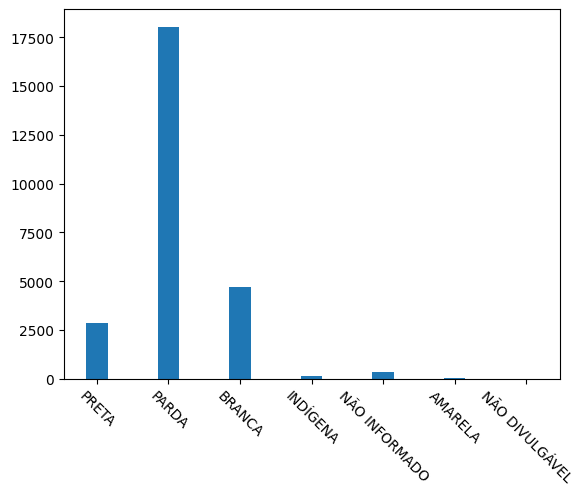

In [4]:
from matplotlib import pyplot as plt

df_eleicoes_ap_pa_2020 = df_eleicoes_ap_pa[df_eleicoes_ap_pa['ANO_ELEICAO'] == 2020].copy()

eixo_x = df_eleicoes_ap_pa_2020.DS_COR_RACA.unique()
eixo_y = df_eleicoes_ap_pa_2020.DS_COR_RACA.value_counts(sort=False)
plt.bar(eixo_x, eixo_y, width=.3)
plt.xticks(rotation=-45)

# Há correlação entre idade, gênero e custo da campanha?

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.101835,0.087984
CD_GENERO,-0.101835,1.000000,-0.035573
VR_DESPESA_MAX_CAMPANHA,0.087984,-0.035573,1.000000


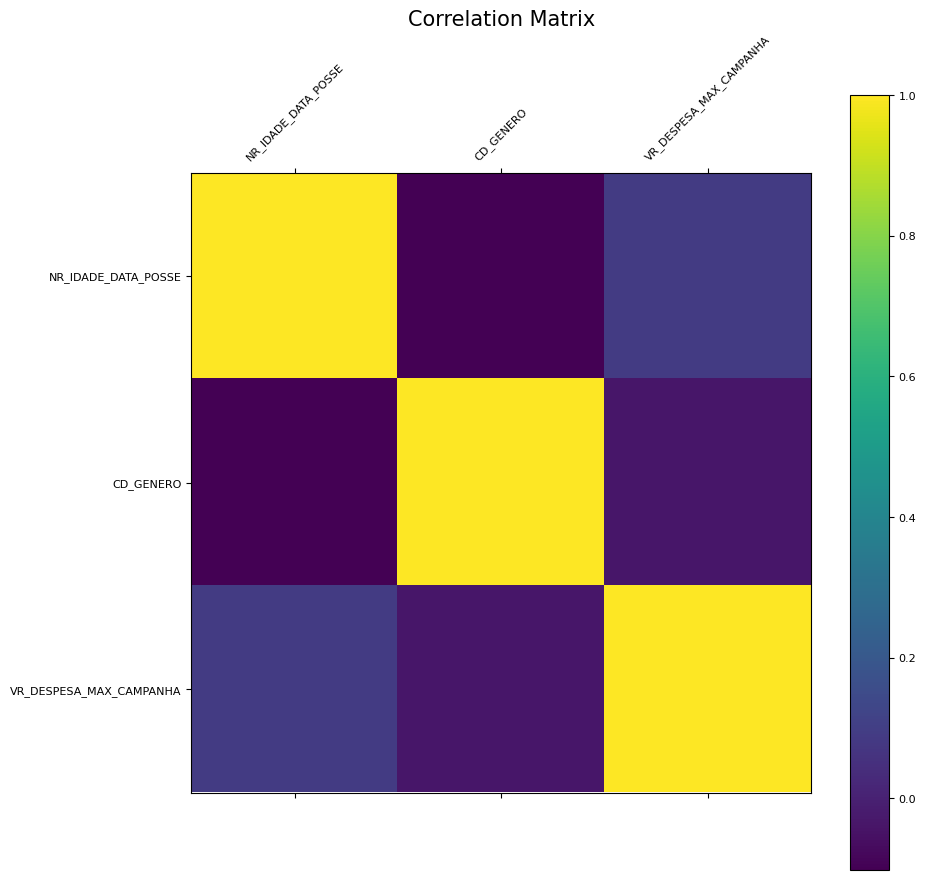

In [50]:
df_eleicoes_ap_pa_idade_genero_custo = df_eleicoes_ap_pa[['NR_IDADE_DATA_POSSE', 'CD_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].copy()

f = plt.figure(figsize=(10, 10))
plt.matshow(df_eleicoes_ap_pa_idade_genero_custo.corr(), fignum=f.number)
plt.xticks(range(df_eleicoes_ap_pa_idade_genero_custo.select_dtypes([object, "number"]).shape[1]), df_eleicoes_ap_pa_idade_genero_custo.select_dtypes([object, "number"]).columns, fontsize=8, rotation=45)
plt.yticks(range(df_eleicoes_ap_pa_idade_genero_custo.select_dtypes([object, "number"]).shape[1]), df_eleicoes_ap_pa_idade_genero_custo.select_dtypes([object, "number"]).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=15);

df_eleicoes_ap_pa_idade_genero_custo.corr(method='pearson', numeric_only=False)
